In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.python.keras import layers
from tensorflow.python.keras import Sequential

In [3]:
import pathlib
data_dir= "C:\\Users\\natlq\\Downloads\\flower_photos\\flower_photos"
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
print(list(data_dir.glob('*/*.jpg')))

[WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/1043

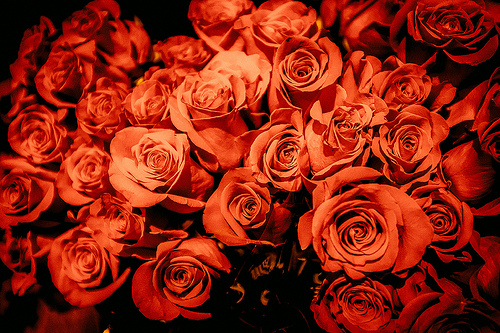

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

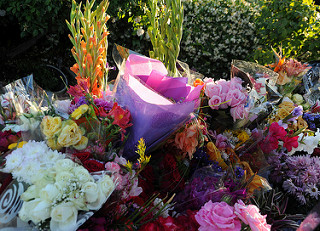

In [7]:
PIL.Image.open(str(roses[3]))

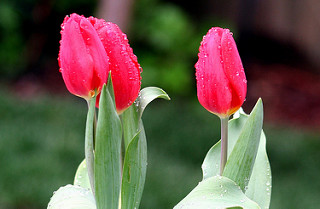

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

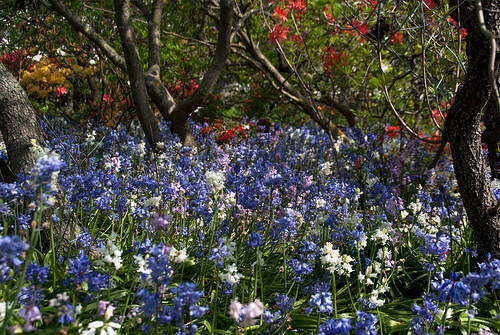

In [9]:
PIL.Image.open(str(tulips[1]))

In [10]:
batch_size = 32
img_height = 180
img_width =180

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


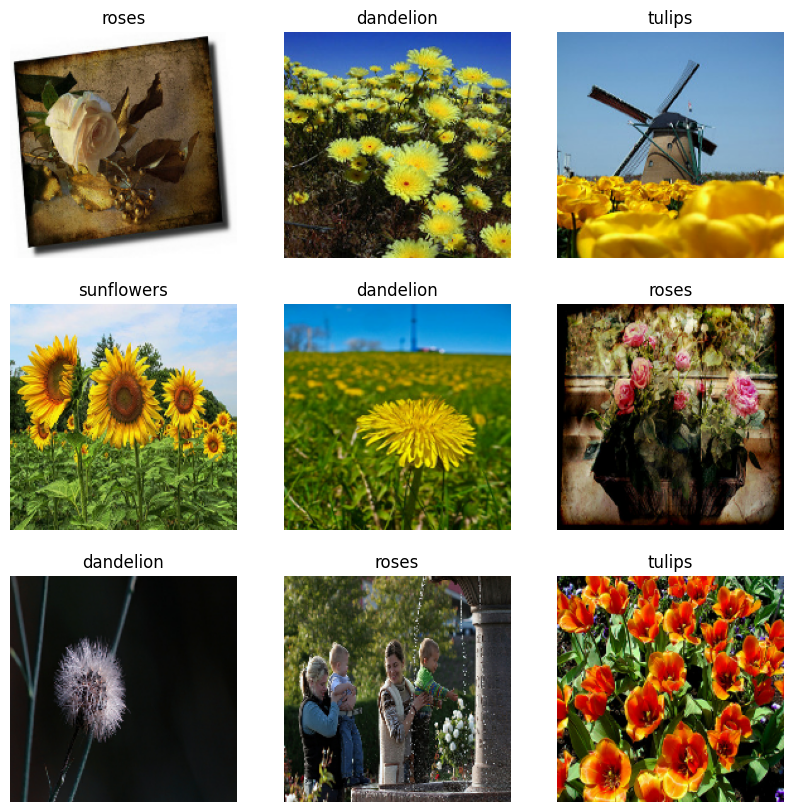

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.99930793


In [19]:
num_classes = len(class_names)

model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 22s 231ms/step - loss: 1.2351 - accuracy: 0.4969 - val_loss: 1.0753 - val_accuracy: 0.5572
Epoch 2/10
92/92 [==============================] - 22s 239ms/step - loss: 0.9525 - accuracy: 0.6342 - val_loss: 0.9583 - val_accuracy: 0.6158
Epoch 3/10
92/92 [==============================] - 22s 242ms/step - loss: 0.7974 - accuracy: 0.6955 - val_loss: 1.0264 - val_accuracy: 0.5954
Epoch 4/10
92/92 [==============================] - 23s 250ms/step - loss: 0.5907 - accuracy: 0.7820 - val_loss: 0.8899 - val_accuracy: 0.6444
Epoch 5/10
92/92 [==============================] - 22s 244ms/step - loss: 0.4077 - accuracy: 0.8556 - val_loss: 1.0300 - val_accuracy: 0.6717
Epoch 6/10
92/92 [==============================] - 22s 244ms/step - loss: 0.2061 - accuracy: 0.9329 - val_loss: 1.0950 - val_accuracy: 0.6594
Epoch 7/10
92/92 [==============================] - 21s 227ms/step - loss: 0.1149 - accuracy: 0.9666 - val_loss: 1.2954 - val_accuracy: 0.6730

In [23]:
# model.fit()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

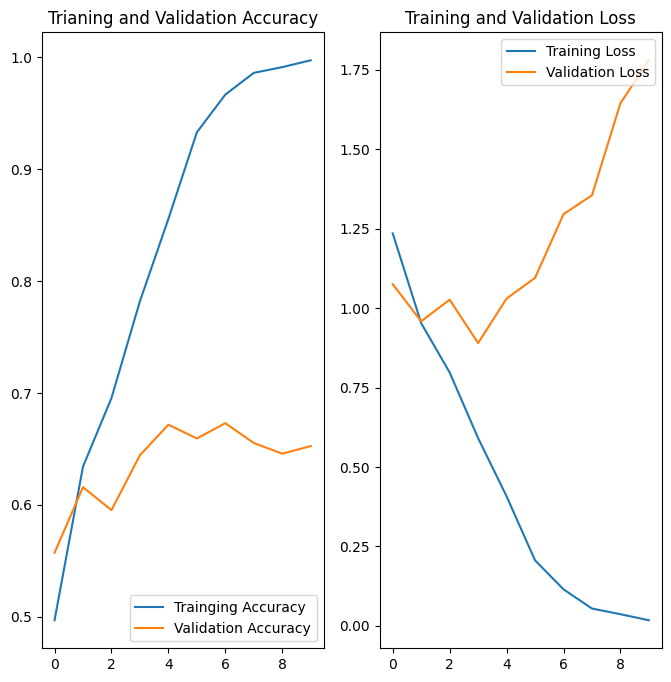

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Trainging Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Trianing and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
data_augmentation = Sequential(
    [
    tf.keras.layers.RandomFlip("horizontal",
                               input_shape=(img_height,
                                            img_width,
                                            3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),                                        
    ]
)

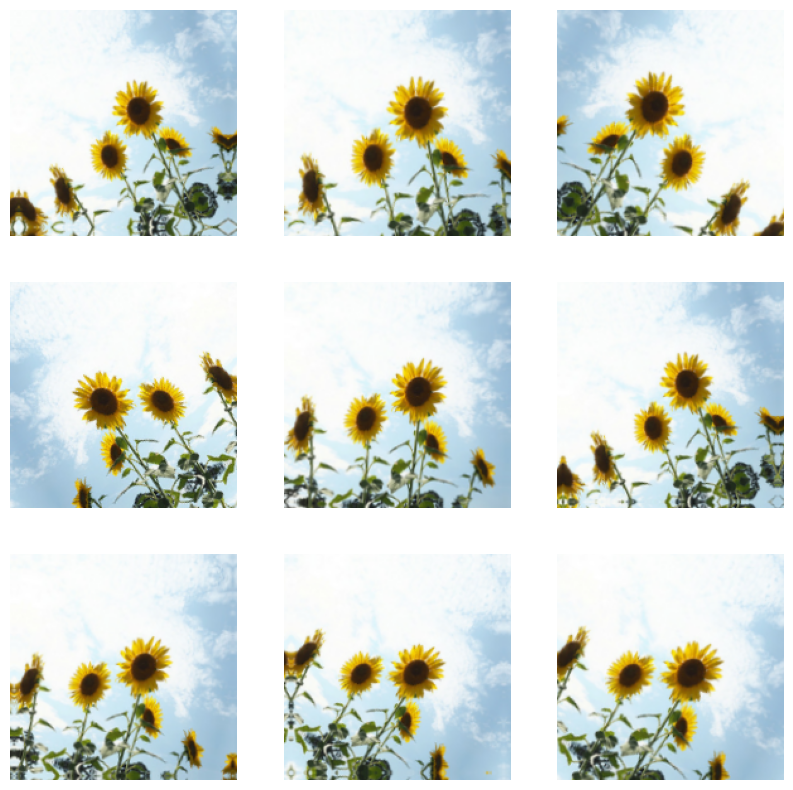

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmentation_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmentation_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [34]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])


In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 24s 259ms/step - loss: 0.2805 - accuracy: 0.9019 - val_loss: 0.7298 - val_accuracy: 0.7807
Epoch 2/15
92/92 [==============================] - 23s 253ms/step - loss: 0.2455 - accuracy: 0.9084 - val_loss: 0.8430 - val_accuracy: 0.7684
Epoch 3/15
92/92 [==============================] - 22s 243ms/step - loss: 0.2642 - accuracy: 0.8995 - val_loss: 0.8334 - val_accuracy: 0.7752
Epoch 4/15
92/92 [==============================] - 22s 243ms/step - loss: 0.2568 - accuracy: 0.9033 - val_loss: 0.7542 - val_accuracy: 0.7725
Epoch 5/15
92/92 [==============================] - 22s 244ms/step - loss: 0.2429 - accuracy: 0.9057 - val_loss: 0.9590 - val_accuracy: 0.7520
Epoch 6/15
92/92 [==============================] - 23s 249ms/step - loss: 0.2360 - accuracy: 0.9131 - val_loss: 0.8277 - val_accuracy: 0.7752
Epoch 7/15
92/92 [==============================] - 23s 249ms/step - loss: 0.2330 - accuracy: 0.9155 - val_loss: 0.8494 - val_accuracy: 0.7670

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

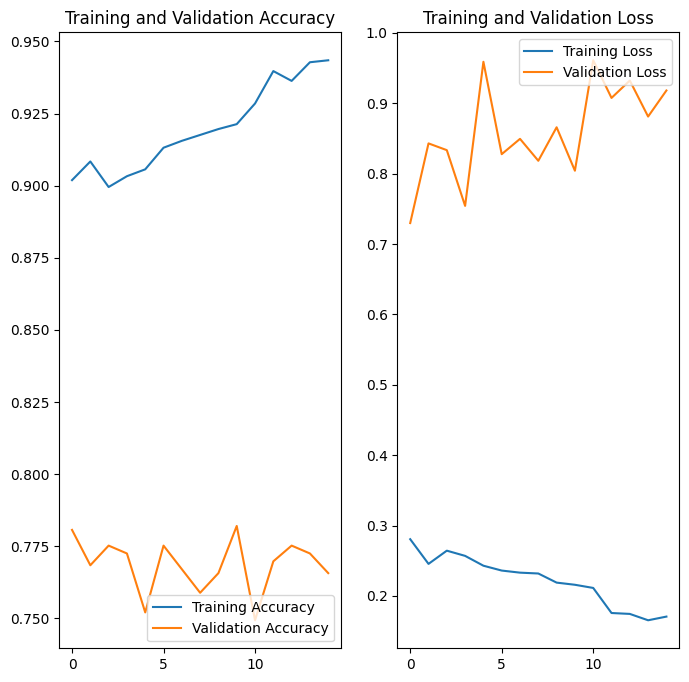

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
sunflower_path = "C:\\Users\\natlq\\Pictures\\tulips.jpg"
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
image_array = np.expand_dims(img_array, axis=0)
print(img_array.size)
print(image_array.size)


97200
97200


In [91]:

predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

print(
    "This iamge most likely belongs to {} with a {:.2f} precent confidence."
    .format(class_names[np.argmax(score)], 100* np.max(score))
)

This iamge most likely belongs to roses with a 100.00 precent confidence.


In [82]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\natlq\AppData\Local\Temp\tmpjfye5w62\assets


INFO:tensorflow:Assets written to: C:\Users\natlq\AppData\Local\Temp\tmpjfye5w62\assets


In [83]:
TF_MODEL_FILE_PATH = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [84]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [85]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [97]:
predictions_lite = classify_lite(sequential_1_input = image_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [98]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100* np.max(score_lite))
)

This image most likely belongs to tulips with a 99.99 percent confidence.


In [95]:
print(np.max(np.abs(predictions - predictions_lite)))

9.536743e-06
